# We will make intuitive visualizations that will help us understand our 'Seeds' data

First we import the necessary libraries for processing (pandas) and ploting (seaborn, matplotlib).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We read our data, making sure that it gets imported without any problems with the header etc.

In [2]:
wheat = pd.read_csv('wheat.data') # Dataset available at https://archive.ics.uci.edu/ml/datasets/seeds
wheat.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


We won't need the 'id' column, so we drop it.

Let's make a histogram of a few features and look at their variance.

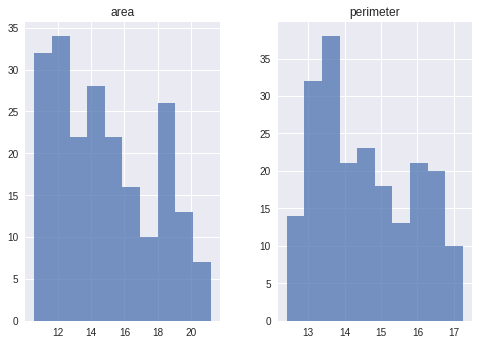

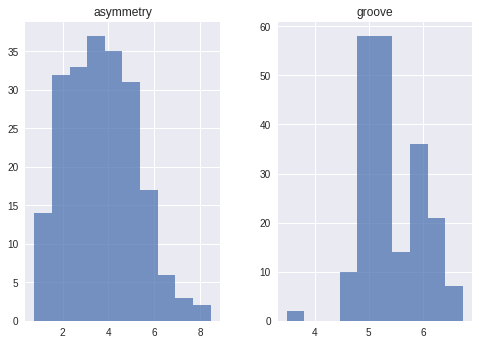

In [3]:
wheat.drop('id',1,inplace=True)

s1 = wheat[['area','perimeter']]
s2 = wheat[['groove','asymmetry']]
s1.hist(alpha=0.75)
s2.hist(alpha=0.75)
plt.show()

With a scatter plot we can look closer at these relationships

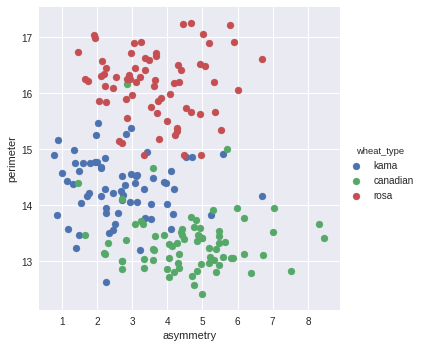

In [4]:
plt.figure()
sns.FacetGrid(wheat, hue='wheat_type', size=5) \
            .map(plt.scatter, 'asymmetry', 'perimeter') \
            .add_legend()
plt.show()

Violin plot. Dense regions of the data are wider, sparse regions are thinner.

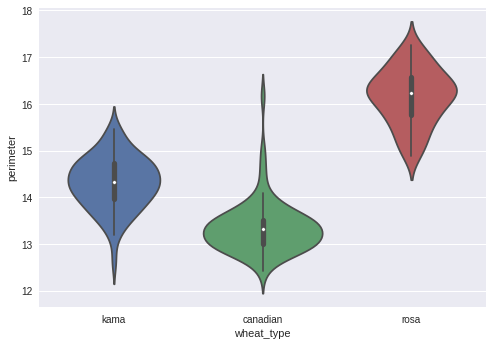

In [5]:
plt.figure()
sns.violinplot(x='wheat_type', y='perimeter', data=wheat, size=6)
plt.show()

Looking at univariate relations.
kdeplot creates and visualizes a kernel density estimate of the underlying feature

/media/yannis/HGST_4TB/Ubudirs/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


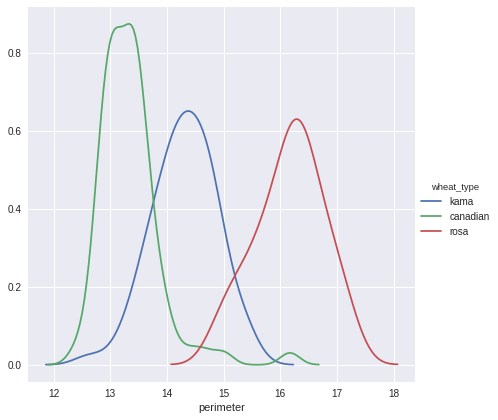

In [6]:
plt.figure()
sns.FacetGrid(wheat, hue="wheat_type", size=6) \
   .map(sns.kdeplot, "perimeter") \
   .add_legend()
plt.show()

A nice overview of relationships between different features. Area x Perimeter seem to have a really strong correlation

/media/yannis/HGST_4TB/Ubudirs/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/media/yannis/HGST_4TB/Ubudirs/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/media/yannis/HGST_4TB/Ubudirs/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


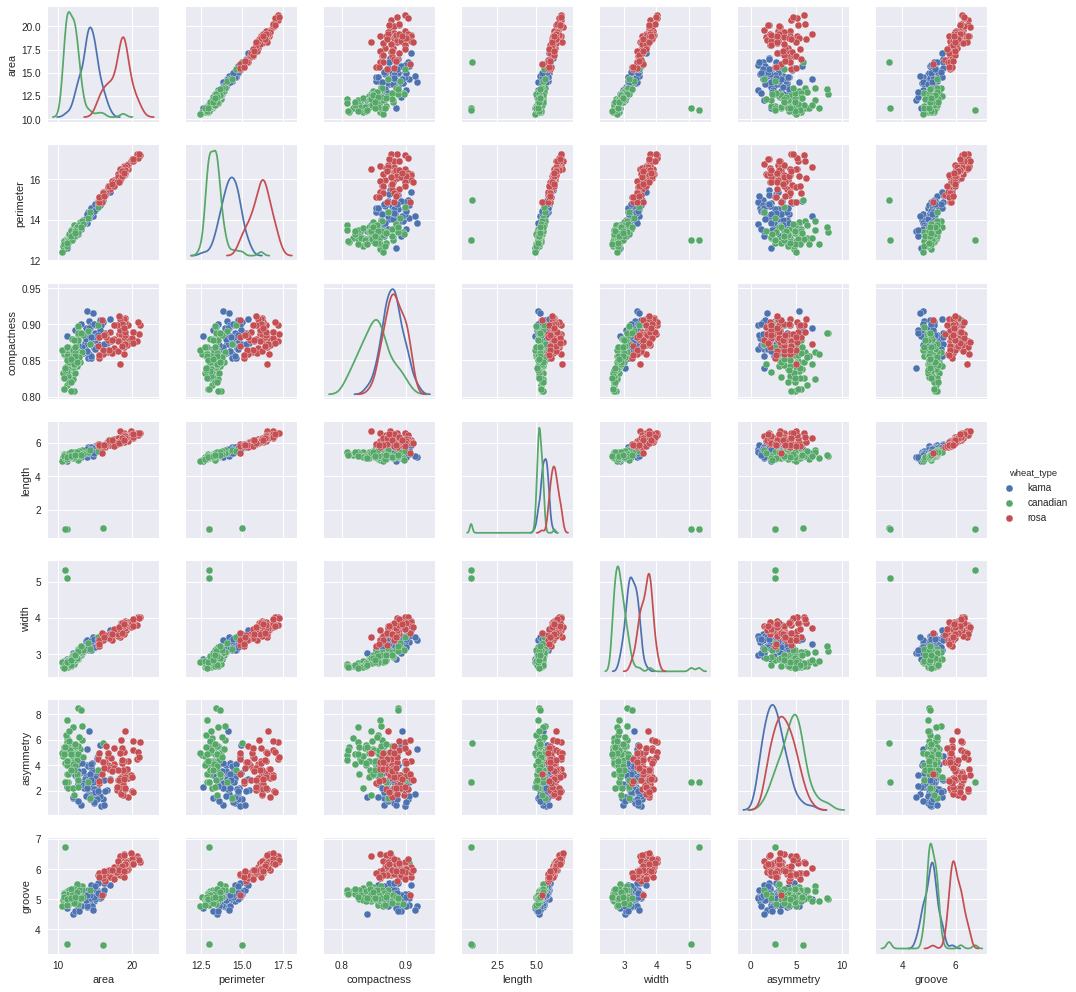

In [7]:
plt.figure()
sns.pairplot(wheat, hue='wheat_type', size=2,diag_kind="kde")
plt.show()

Andrews Curves helps visualize higher dimensionality, multivariate data, by plotting each observation as a curve. The feature values act as coefficients of the curve.

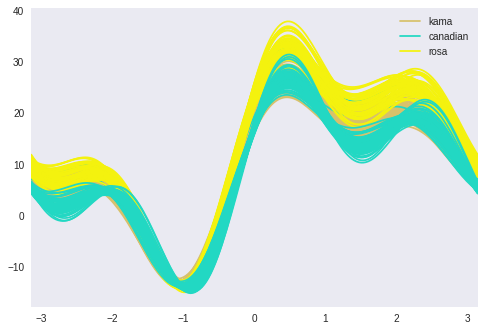

In [8]:
from pandas.tools.plotting import andrews_curves
plt.figure()
andrews_curves(wheat,'wheat_type')
plt.show()

Parallel coordinates let you view observations with more than three dimensions by tacking on additional parallel coordinates. Best use for limited number of features.

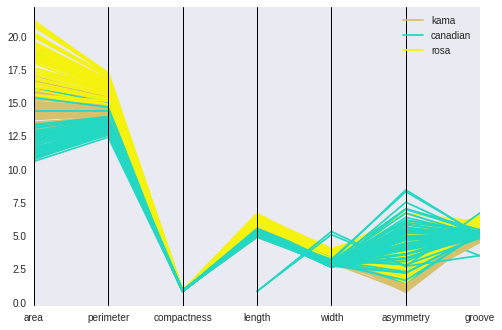

In [9]:
from pandas.tools.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(wheat, 'wheat_type')
plt.show()

Radviz - "...puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature" ~ Ben Hammer, kaggle notebook

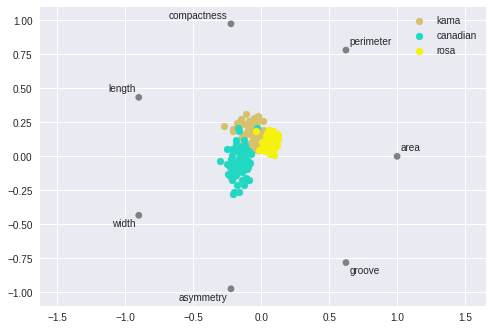

In [10]:
from pandas.tools.plotting import radviz
plt.figure()
radviz(wheat,'wheat_type')
plt.show()
